In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit
plt.rcParams['figure.figsize'] = [15, 10]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.75
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

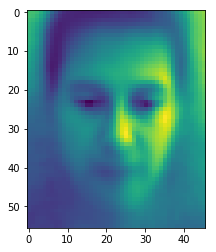

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(mean_img)

In [5]:

# print(X_bar)
start = timeit.default_timer()
S = np.matmul(A,np.transpose(A))/N
w, v = np.linalg.eig(S)
print(w[0])
print(v[0])

(974505.2058127596+0j)
[-1.59914563e-02+0.j         -1.35044381e-02+0.j
 -1.68214271e-02+0.j         ... -3.32727503e-05+0.00025782j
 -3.32727503e-05-0.00025782j -3.79522444e-04+0.j        ]


c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


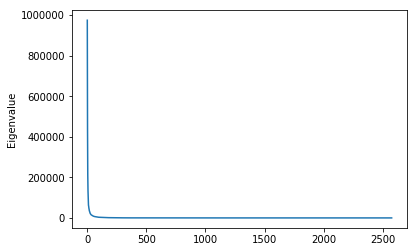

In [6]:
[v for w,v in sorted(zip(w, v), reverse=True)]
plt.plot(w)
plt.ylabel('Eigenvalue')
plt.show()
end = timeit.default_timer()

In [7]:
print(end-start)
# print(X_bar)

start = timeit.default_timer()
S_LDA = np.matmul(np.transpose(A),A)/N
w_lda, v_lda = np.linalg.eig(S_LDA)

12.313756022563005


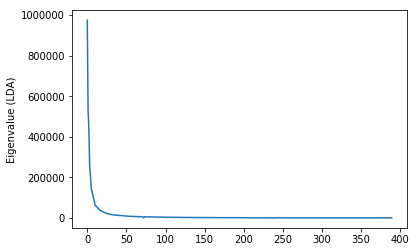

In [8]:
[v_lda for w_lda,v_lda in sorted(zip(w_lda, v_lda), reverse=True)]
plt.plot(w_lda)
plt.ylabel('Eigenvalue (LDA)')
plt.show()
end = timeit.default_timer()

In [9]:
print(end-start)

0.41350301292252745


c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


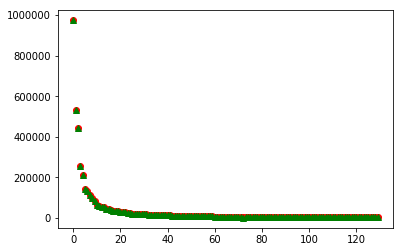

In [10]:
size = 130
plt.plot(np.arange(size),w[:size], 'ro',  np.arange(size), w_lda[:size], 'g^')
plt.show()

c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


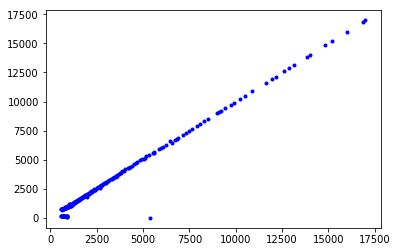

In [11]:
size = 260
plt.plot(w[30:size], w_lda[30:size], 'b.')
plt.show()

In [12]:
diff = w[:100]-w_lda[:100]
value = np.dot(diff,np.transpose(diff))/100
print(value)

(294593.5352294054+0j)
